In [11]:
"""======================================================
#Version: v1.00
#Authors:  Ann-Marie Walker, Vivek Gupta, and Manuj Arora, NJIT, Sept 2025

#This notebook was created by three students, Ann-Marie Walker, Vivek Gupta, and Manuj Arora, who worked together as a group to complete the Midterm Project for DS 637.

The code below sets up the notebook to answer the questions for the Midterm.

    #Logic: 
        The pandas library is being imported so that the tickers could be loaded into DataFrames.
        An empty dictionary by the name of 'dfs' is being created to store the ticker dataframes.
        A "for" loop iterates through the tickers list and uses the name of each variable to read the .csv file from the file path.
    "#Output: Verifying that the ticker files were read and loaded into dataframes in the dfs dictionary by printing the keys in the dictionary and printing the AAPL dataframe as an example."""


import pandas as pd

# list of tickers (consistent lowercase for file names, uppercase for keys)
tickers = ["aapl", "amzn", "goog", "ibm", "meta", "msft", "nflx", "orcl", "sap", "tsla"]

# folder path
path = "/Users/aromanuj/Documents/DS637-MidtermP/"

# dictionary to store DataFrames
dfs = {}

# load, clean, and store each file
for t in tickers:
    df = pd.read_csv(f"{path}{t}.csv", index_col="Date")
    df.index = pd.to_datetime(df.index.astype(str).str.strip(), format="%d-%b-%y", errors="coerce")
    df = df.sort_index()
    dfs[t.upper()] = df

print("Loaded DataFrames:", list(dfs.keys()))
print(dfs["AAPL"].head())

          

Loaded DataFrames: ['AAPL', 'AMZN', 'GOOG', 'IBM', 'META', 'MSFT', 'NFLX', 'ORCL', 'SAP', 'TSLA']
             Open   High    Low  Close  Adj Close       Volume
Date                                                          
2018-01-02  42.54  43.08  42.31  43.06      40.57  102,223,600
2018-01-03  43.13  43.64  42.99  43.06      40.56  118,071,600
2018-01-04  43.13  43.37  43.02  43.26      40.75   89,738,400
2018-01-05  43.36  43.84  43.26  43.75      41.21   94,640,000
2018-01-08  43.59  43.90  43.48  43.59      41.06   82,271,200


In [12]:
"""======================================================
#Version: v1.00
#Authors:  Ann-Marie Walker, Vivek Gupta, and Manuj Arora, NJIT, Sept 2025

Logic: The code below creates a new DataFrame that concatenates the 'Close' and 'Adj Close' columns from each ticker dataframes to a new dataframe called 'df_close_adjclose'

Output: The output is the full DataFrame from Jan 02 2018 to Dec 28 2018 for each tickers close and adjusted close price """ 

# combine all Close and Adj Close columns
df_close_adjclose = pd.concat(
    {f"{t}_{col.replace(' ', '')}": dfs[t][col] 
     for t in dfs for col in ["Close", "Adj Close"]},
    axis=1
).sort_index()

print(df_close_adjclose)


            AAPL_Close  AAPL_AdjClose  AMZN_Close  AMZN_AdjClose  GOOG_Close  \
Date                                                                           
2018-01-02       43.06          40.57       59.45          59.45       53.25   
2018-01-03       43.06          40.56       60.21          60.21       54.12   
2018-01-04       43.26          40.75       60.48          60.48       54.32   
2018-01-05       43.75          41.21       61.46          61.46       55.11   
2018-01-08       43.59          41.06       62.34          62.34       55.35   
...                ...            ...         ...            ...         ...   
2018-12-21       37.68          36.03       68.87          68.87       48.98   
2018-12-24       36.71          35.10       67.20          67.20       48.81   
2018-12-26       39.29          37.57       73.54          73.54       51.97   
2018-12-27       39.04          37.33       73.08          73.08       52.19   
2018-12-28       39.06          37.35   

Question 1. On Jan 02 2018, you split the $\$5m$ into 5 $\$1m$, and use them to buy 5 stocks from the 10 stocks. For example, IBM close price was $\$154.25$. With $\$1m$, you can buy max 6482 shares with cost $\$999848.5$ with $\$151.5$‬ cash left. You decided to spend $\$1m$ on each of `['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN']` respectively and keep the rest cash into a zero-interest cash account. On Jan 02 2018, your mark to market value (MTM) is $\$5m$ if combining all stocks value and cash. Your holdings of stocks and cach account is your portfolio.

\begin{equation*}
\ MTM^t =  cash^t + \sum_{k=1}^5 Shares_k^t \times ClosePrice_k^t \
\end{equation*}

Buy 5 chosen stocks (IBM, MSFT, GOOG, AAPL, AMZN) with $1M using their Jan 2 2018 closing prices.
Assumption - We can only buy whole shares, not fractions
Track MTM
Track leftover cash

In [13]:
"""

======================================================
#Version: v1.00
#Authors:  Ann-Marie Walker, Vivek Gupta, and Manuj Arora, NJIT, Sept 2025

Logic: There will be some arithmetic calculations needed to answer Q1; therefore, the Numpy library was imported. The five tickers that are being bought are listed under variable "BUY_TICKERS", the purchase date 
is saved under the "BUY_DATE" variable, and the $1 million is saved under "ALLOCATION_PER_TICKER". A for loop is used to create a new DataFrame called portfolio. In portfolio, the purchased share prices, # of shares, 
with leftover cash are outlined for each ticker. An empty list of rows is created to store a dictionary of outputs from the for loop. If the purchase date is not in the ticker Dataframe the loop will return an error.
If the date is there, the 'price' variable locates the close price for the ticker, the 'shares' variable divides $1M by the price to get a whole number of shares, the cost variable is the number of shares the user is able
to buy with $1M, and leftover cash is $1M minus the cost to buy the number of shares.


Output: A Dataframe called 'portfolio' that shows the Close price, # of shares able to be purchased with $1M and cash left for each ticker. The sum of costs and cash_left are saved to variables to calculate the MTM.""" 

import numpy as np

BUY_TICKERS = ["AAPL","AMZN","GOOG","IBM","MSFT"] 
BUY_DATE = pd.Timestamp("2018-01-02")
ALLOCATION_PER_TICKER = 1_000_000

rows = []

for t in BUY_TICKERS:
    df = dfs[t]                                      
    if BUY_DATE not in df.index:
        raise ValueError(f"{t}: {BUY_DATE.date()} not in data")
    price = float(df.loc[BUY_DATE, "Close"])        
    shares = int(ALLOCATION_PER_TICKER // price)          
    cost = shares * price
    cash_left = ALLOCATION_PER_TICKER - cost

    rows.append({
        "Ticker": t,
        "Close(2018-01-02)": price,
        "Shares": shares,
        "Cost": cost,
        "CashLeft": cash_left
    })

portfolio = pd.DataFrame(rows).set_index("Ticker")

total_cost = float(portfolio["Cost"].sum())
total_cash = float(portfolio["CashLeft"].sum())

mtm_2018_01_02 = total_cost + total_cash

print(portfolio)
print("Leftover Cash= $",total_cash)
print("Total MTM on Jan 02, 2018 = $",mtm_2018_01_02)


        Close(2018-01-02)  Shares       Cost  CashLeft
Ticker                                                
AAPL                43.06   23223  999982.38     17.62
AMZN                59.45   16820  999949.00     51.00
GOOG                53.25   18779  999981.75     18.25
IBM                147.47    6781  999994.07      5.93
MSFT                85.95   11634  999942.30     57.70
Leftover Cash= $ 150.5
Total MTM on Jan 02, 2018 = $ 5000000.0


2. Your trading strategy is "5 days rebalancing of buying low". Here is how it works. You keep your portfolio unchanged until 5 days later on Jan 09 2018. Now you want to re-check the market and adjust your portfolio. You will compute the "Adj Close" price changes from Jan 02 to Jan 09, and find the 5 stocks whose "Adj Close" prices dropped the most in terms of percentage. You sell all current holdings on Jan 09 "Close" prices to convert your portfolio to all cash. Then immediately split your cash, including your cash account, to 5 equal parts to buy the 5 stocks that dropped the most from Jan 02 to Jan 09 on 'Adj Close' prices. You always buy the max shares of stock on the "Close" price and keep the rest cash in cash account. Now the portfolio should be different from 5 days ago. This operation is called "rebalancing".

    Keep in mind, the MTM will change every day, even when your portfolio holdings don't change, because the stock prices change.

In [14]:

"""======================================================"""
"""
# This Python code solves the 5 days rebalancing on buying low problem statement.
# It uses pandas library to handle dataframes and perform operations on stock prices.
# The code reads stock data from CSV files, processes the data to extract close and adjusted
# close prices, and implements a rebalancing strategy every 5 trading days.
# The strategy involves selling all current holdings and buying the 5 worst decliners
# based on adjusted close prices.
# The code tracks the mark-to-market (MTM) value of the portfolio over time and
# provides a summary of the final holdings and cash balance. 

    "#Version: v1.00"
    "#Author: Vivek Gupta, Manuj Arora, Ann-Marie C. Walker NJIT, Sept 2025"
================================================================
   Key logics used- 
   1. Have a formula to calculate dates to rebalance,
   2. Create 2 functions to buy/sell stocks at close prices,
   3. Create a function to calculate MTM on given dates.
================================================================

============================================================"""


# Global Variables / Settings

START_DATE = "2018-01-02"
INITIAL_STOCKS = ["IBM", "MSFT", "GOOG", "AAPL", "AMZN"]  
TOTAL_INITIAL_CASH = 5_000_000
REBALANCE_EVERY_N_TRADING_DAYS = 5      
        


# Prepare Close / AdjClose frames
# df_close_adjclose already exists from above problem and have columns like 'AAPL_Close','GOOG_AdjClose', etc.
# Need to split into 2 separate DataFrames: close and adjclose with columns named by ticker only.

# Close prices
close = df_close_adjclose[[c for c in df_close_adjclose.columns if c.endswith("_Close")]].copy()
close.columns = [c.replace("_Close", "") for c in close.columns]

# Adj Close price
adj = df_close_adjclose[[c for c in df_close_adjclose.columns if c.endswith("_AdjClose")]].copy()
adj.columns = [c.replace("_AdjClose", "") for c in adj.columns]

# Sort both by date
close = close.sort_index()
adj = adj.reindex(close.index).sort_index()
all_tickers = list(close.columns)
"""======================================================"""
"""
# Buy stocks on a given date function
    "#Function_Name: buy_equal_buckets_at_close"
    "#Args: date, tickers_to_buy, cash_amount, close_px"
    "#Output: shares, leftover_cash_total"
        "#Version: v1.00"
        "#Author: Vivek Gupta, Manuj Arora, Ann-Marie C. Walker NJIT, Sept 2025"
    ================================================================
    Key Logic used - Split cash_amount equally across tickers_to_buy, buy integer shares at close price, return (shares_dict, leftover_cash).
                 Cash_Amount is divided by number of tickers to buy to get bucket size.
                 For each ticker, calculate number of shares to buy as floor(bucket / close price).
                 Calculate cost as number of shares * close price.
                 Update shares dictionary and accumulate leftover cash.
                
================================================================

============================================================"""
#Function Begins Here
def buy_equal_buckets_at_close(date, tickers_to_buy, cash_amount, close_px):
 
    shares = {t: 0 for t in all_tickers}
    if len(tickers_to_buy) == 0:
       return shares, float(cash_amount)

    #cash_amount = float(cash_amount)
    bucket = cash_amount / len(tickers_to_buy)
    leftover_total = 0.0
    for t in tickers_to_buy:
        px = float(close_px.at[date, t])
        if np.isnan(px) or px <= 0:
            # skip if price missing or invalid
            leftover_total += bucket
            continue
        n = int(np.floor(bucket / px))
        cost = n * px
        shares[t] = n
        leftover_total += (bucket - cost)
    return shares, float(leftover_total)
#Function Ends Here


"""======================================================"""
"""
# Sell stocks on a given date function
    "#Function_Name: sell_all_at_close"
    "#Args: ddate, shares_dict, close_px"
    "#Output: value - cash proceeds from selling all shares"
        "#Version: v1.00"
        "#Author: Vivek Gupta, Manuj Arora, Ann-Marie C. Walker NJIT, Sept 2025"
    ================================================================
    Key Logic used - For each ticker in shares_dict, if shares > 0, get close price on date, calculate proceeds as shares * close price, accumulate total proceeds.
                    Return total proceeds as float.
================================================================

============================================================"""
#Function Begins Here
def sell_all_at_close(date, shares_dict, close_px):
   
   
    proceeds = 0.0
    for t, n in shares_dict.items():
      
        if n:
            px = float(close_px.at[date, t])
            if not np.isnan(px) and px > 0:
                proceeds += n * (px)
    return float(proceeds)
# Function Ends Here

"""======================================================"""
"""
# Calculate MTM on a given date function
    "#Function_Name: mtm_on_date"
    "#Args: date, shares_dict, cash_balance, close_px"
    "#Output: value - MTM value as float"
        "#Version: v1.00"
        "#Author: Vivek Gupta, Manuj Arora, Ann-Marie C. Walker NJIT, Sept 2025"
    ================================================================
    Key Logic used -  MTM = cash + sum(shares * close)
                    Return total MTM as float.
================================================================

============================================================"""
#Function Begins Here
def mtm_on_date(date, shares_dict, cash_balance, close_px):
    """
    MTM = cash + sum(shares * close)
    """
    value = cash_balance
    for t, n in shares_dict.items():
        if n:
            px = float(close_px.at[date, t])
            if not np.isnan(px) and px > 0:
                value += n * px
    return float(value)
#Function Ends Here

"""======================================================"""
"""
# implement rebalancing every N trading days
   
        "#Version: v1.00"
        "#Author: Vivek Gupta, Manuj Arora, Ann-Marie C. Walker NJIT, Sept 2025"
    ================================================================
    Key Logic used - Initialize portfolio on START_DATE with equal buckets of INITIAL_STOCKS.
                    Loop through rebalance dates every N trading days.
                    On each rebalance date:
                    1) Compute AdjClose % change from previous rebalance date to current date.
                    2) SELL ALL at current Close.
                    3) BUY equal buckets of the worst decliners at current Close.
                    Track MTM daily.
================================================================

============================================================"""
# ================================
# Initialize portfolio on START_DATE
# ==============================
dates = close.index
start_idx = dates.get_loc(START_DATE)

# Buy initial 5 (equal buckets in the beginning)
initial_bucket = TOTAL_INITIAL_CASH / len(INITIAL_STOCKS)
shares = {t: 0 for t in all_tickers}
cash = 0.0
all
for stockvar in INITIAL_STOCKS:
    px = float(close.at[pd.Timestamp(START_DATE), stockvar])
    n = int(np.floor(initial_bucket / px))
    cost = n * px
    shares[stockvar] += n
    cash += (initial_bucket - cost)

# Track MTM 
mtm_series_low = pd.Series(index=dates, dtype=float)
holdings_history = {}   #snapshot of holdings at each rebalance date, to be used in further analysis
trades_log = []         #record rebalances, for logging/debugging and verification

# Fill MTM from start date until first rebalance day
for i in range(start_idx, len(dates)):
    d = dates[i]
    mtm_series_low.loc[d] = mtm_on_date(d, shares, cash, close)


# Rebalance by invoking in loop (every 5 trading days)
prev_reb_idx = start_idx
holdings_history[dates[prev_reb_idx]] = dict(shares)

# Build all rebalance index positions (5, 10 etc)
rebalance_indices = list(range(start_idx + REBALANCE_EVERY_N_TRADING_DAYS, len(dates), REBALANCE_EVERY_N_TRADING_DAYS))

for r_idx in rebalance_indices:
    d_prev = dates[prev_reb_idx]
    d_cur = dates[r_idx]
   
    # 1) Compute AdjClose % change from previous rebalance date to current date
    # Use available tickers; drop ones with NaN either day
    adj_prev = adj.loc[d_prev, all_tickers]
    adj_cur = adj.loc[d_cur, all_tickers]
    pct_change = (adj_cur / adj_prev - 1.0).dropna().sort_values()  # ascending order puts worst decliners first
    
    # pick N worst decliners stocks based upon percentage change, first 5 tickers
    worst_decliners = list(pct_change.index[:5])
   
    # 2) SELL ALL at current Close, invoke function defined earlier
    proceeds = sell_all_at_close(d_cur, shares, close)
    cash += proceeds
    # reset shares
    shares = {t: 0 for t in all_tickers}

    # 3) BUY equal buckets of the worst decliners at current Close, invoke function defined earlier
    new_shares, leftover = buy_equal_buckets_at_close(d_cur, worst_decliners, cash, close)
    
    # update portfolio with new shares and leftover cash
    cash = leftover
    for t, n in new_shares.items():
        shares[t] += n
        #print(shares[t])
   

    # Save holdings snapshot
    holdings_history[d_cur] = dict(shares)

    # Update MTM from this day onward (overwrite from d_cur forward)
    for i in range(r_idx, len(dates)):
        d = dates[i]
        mtm_series_low.loc[d] = mtm_on_date(d, shares, cash, close)

    # step
    prev_reb_idx = r_idx


# Results from the final MTM series
print("First/last MTM:")
print(mtm_series_low.iloc[[0, -1]])

print("\nLast holdings on snapshot date:")
last_snap_date = max(holdings_history.keys())
nz = {k: v for k, v in holdings_history[last_snap_date].items() if v}
print(last_snap_date.date(), nz)
print(f"Ending cash: ${cash:,.2f}")

## Program ENDS HERE ##


First/last MTM:
Date
2018-01-02    5000000.00
2018-12-28    5259082.58
dtype: float64

Last holdings on snapshot date:
2018-12-21 {'AAPL': 26539, 'AMZN': 14520, 'META': 8003, 'NFLX': 4058, 'TSLA': 46904}
Ending cash: $185.96


3. Corporations generally issue stock dividends on some days. The total dividend you get on such a day is the stock dividend  times your shares if you have shares of this stock on the dividend day. If you buy shares on the dividend day, these bought shares are not qualified to get dividend. If you sell shares on the dividend day, the sold shares are qualified to get dividend. For example, on 2/8/2018, IBM issued \$1.5 dividend per share. In your cash account, you will automatically get

\begin{equation*}
\$1.5 \times \left(your\ IBM\ shares\ on\ 2/8/2018\right)
\end{equation*} 


In [15]:

"""======================================================"""
"""
# This Python code solves the 5 days rebalancing on buying low problem statement along with dividend calculations.
# It uses pandas library to handle dataframes and perform operations on stock prices.
# The code reads stock data from CSV files, processes the data to extract close and adjusted
# close prices, and implements a rebalancing strategy every 5 trading days.
# The strategy involves selling all current holdings and buying the 5 worst decliners. Selling price includes dividends. 
# Dividends are calculated based on the difference between Close and Adj Close prices.
# The code tracks the mark-to-market (MTM) value of the portfolio over time and
# provides a summary of the final holdings and cash balance. 

    "#Version: v1.00"
    "#Author: Vivek Gupta, Manuj Arora, Ann-Marie C. Walker NJIT, Sept 2025"
================================================================
   Key logics used- 
   1. Have a formula to calculate dates to rebalance,
   2. Create 2 functions to buy/sell stocks at close prices,
   3. Create a function to compute dividends from wide format.
   4. Create a function to calculate MTM on given dates.
================================================================

============================================================"""

"""======================================================"""
"""
# Find dividends of the 10 stocks for year 2018
    "#Function_Name: compute_dividends_from_wide"
    "#Args:none
    "#Output: date, share, dividend"
        "#Version: v1.00"
        "#Author: Vivek Gupta, Manuj Arora, Ann-Marie C. Walker NJIT, Sept 2025"
    ================================================================
    Key Logic used - Find the change of close price vs. adj. price for the share on the given date for each share.
    On the day of difference of more than 0.10 USD there is an indication of dividend payment                
================================================================

============================================================"""
def compute_dividends_from_wide():
  
    tickers = dfs
    min_div=0.10
    round_to=2
    frames = []
    for t in tickers:
        c_close = f"{t}_Close"
        c_adj   = f"{t}_AdjClose"
        if c_close not in df_close_adjclose.columns or c_adj not in df_close_adjclose.columns:
            continue
        d = df_close_adjclose[[c_close, c_adj]].sort_index().rename(
            columns={c_close:"Close", c_adj:"Adj Close"}).copy()
        ratio_close = d["Close"].shift(1) / d["Close"]
        ratio_adj   = d["Adj Close"].shift(1) / d["Adj Close"]
        d["Dividend"] = (ratio_close - ratio_adj) * d["Close"]
        divs = d.loc[d["Dividend"] > min_div, ["Dividend"]].copy()
        if divs.empty:
            continue
        divs["Ticker"] = t
        divs["Dividend"] = divs["Dividend"].round(round_to)
        divs = divs.reset_index().rename(columns={"index":"Date"})
        frames.append(divs[["Date","Ticker","Dividend"]])
    if frames:
        out = pd.concat(frames, ignore_index=True).sort_values(["Date","Ticker"]).reset_index(drop=True)
    else:
        out = pd.DataFrame(columns=["Date","Ticker","Dividend"])
    return out

# Example (uses your existing df_close_adjclose in memory):
dividends_df = compute_dividends_from_wide()

# ================================
# Global Variables / Settings
# ================================
START_DATE = "2018-01-02"
INITIAL_STOCKS = ["IBM", "MSFT", "GOOG", "AAPL", "AMZN"]  
TOTAL_INITIAL_CASH = 5_000_000
REBALANCE_EVERY_N_TRADING_DAYS = 5      
N_TO_BUY_AT_REBALANCE = 5               # buy the 5 worst decliners


# Prepare Close / AdjClose frames
# df_close_adjclose already exists from above problem and have columns like 'AAPL_Close','GOOG_AdjClose', etc.
# Need to split into 2 separate DataFrames: close and adjclose with columns named by ticker only.


# Close prices (columns named by ticker)
close = df_close_adjclose[[c for c in df_close_adjclose.columns if c.endswith("_Close")]].copy()
close.columns = [c.replace("_Close", "") for c in close.columns]

# Adj Close prices (columns named by ticker)
adj = df_close_adjclose[[c for c in df_close_adjclose.columns if c.endswith("_AdjClose")]].copy()
adj.columns = [c.replace("_AdjClose", "") for c in adj.columns]

# Ensure dates are sorted and consistent
close = close.sort_index()
adj = adj.reindex(close.index).sort_index()


"""======================================================"""
"""
# Sell stocks on a given date function
    "#Function_Name: sell_all_at_close_with_dividend"
    "#Args: ddate, shares_dict, close_px"
    "#Output: value - cash proceeds from selling all shares along with Dividend calculation"
        "#Version: v1.00"
        "#Author: Vivek Gupta, Manuj Arora, Ann-Marie C. Walker NJIT, Sept 2025"
    ================================================================
    Key Logic used - For each ticker in shares_dict, if shares > 0, get close price on date, calculate proceeds as shares * close price, accumulate total proceeds.
                    Return total proceeds as float.
================================================================

============================================================"""
#Function Begins Here
from datetime import timedelta

def sell_all_at_close_with_dividend(date, shares_dict, close_px):
    """
    Sell everything at close price on 'date', return proceeds (float).
    Includes dividends paid in the last 5 calendar days.
    """
    Dividend_DF = compute_dividends_from_wide()
    proceeds = 0.0
    sell_date = pd.to_datetime(date)
    start_date = sell_date - timedelta(days=4)   

    for t, n in shares_dict.items():
        # Filter dividends for ticker within the 5-day window
        mask = (
            (Dividend_DF["Ticker"] == t) &
            (Dividend_DF["Date"] >= start_date) &
            (Dividend_DF["Date"] <= sell_date)
        )
        dividend_for_share = Dividend_DF.loc[mask, "Dividend"].sum()

        if n:
            px = float(close_px.at[date, t])
            if not np.isnan(px) and px > 0:
                proceeds += n * (px + dividend_for_share)

    return float(proceeds)
#Function Ends Here


# Initialize portfolio on START_DATE
dates = close.index
start_idx = dates.get_loc(START_DATE)

# Buy initial 5 (equal $1M buckets)
initial_buckt = TOTAL_INITIAL_CASH / len(INITIAL_STOCKS)
shares = {t: 0 for t in all_tickers}
cash = 0.0
all
for t in INITIAL_STOCKS:
    px = float(close.at[pd.Timestamp(START_DATE), t])
    n = int(np.floor(initial_bucket / px))
    cost = n * px
    shares[t] += n
    cash += (initial_bucket - cost)

# Track MTM daily
mtm_series = pd.Series(index=dates, dtype=float)
holdings_history = {}   # optional: snapshot of holdings at each rebalance date
trades_log = []         # optional: record rebalances

# Fill MTM from start date until first rebalance day
for i in range(start_idx, len(dates)):
    d = dates[i]
    mtm_series.loc[d] = mtm_on_date(d, shares, cash, close)


# Rebalance loop (every 5 trading days)
prev_reb_idx = start_idx
holdings_history[dates[prev_reb_idx]] = dict(shares)

# Build all rebalance index positions (start+5, start+10, …)
rebalance_indices = list(range(start_idx + REBALANCE_EVERY_N_TRADING_DAYS, len(dates), REBALANCE_EVERY_N_TRADING_DAYS))

for r_idx in rebalance_indices:
    d_prev = dates[prev_reb_idx]
    d_cur = dates[r_idx]
   
    # 1) Compute AdjClose % change from previous rebalance date to current date
    # Use available tickers; drop ones with NaN either day
    adj_prev = adj.loc[d_prev, all_tickers]
    adj_cur = adj.loc[d_cur, all_tickers]
    pct_change = (adj_cur / adj_prev - 1.0).dropna().sort_values()  # ascending → worst decliners first
    
    # pick N worst decliners
    worst_decliners = list(pct_change.index[:N_TO_BUY_AT_REBALANCE])
   
    # 2) SELL ALL at current Close
    proceeds = sell_all_at_close_with_dividend(d_cur, shares, close)
    cash += proceeds
    # reset shares
    shares = {t: 0 for t in all_tickers}

    # 3) BUY equal buckets of the worst decliners at current Close
    new_shares, leftover = buy_equal_buckets_at_close(d_cur, worst_decliners, cash, close)
    # update portfolio
    cash = leftover
    for t, n in new_shares.items():
        shares[t] += n
        #print(shares[t])
    

    # Save holdings snapshot
    holdings_history[d_cur] = dict(shares)

    # Update MTM from this day onward (overwrite from d_cur forward)
    for i in range(r_idx, len(dates)):
        d = dates[i]
        mtm_series.loc[d] = mtm_on_date(d, shares, cash, close)

    # step
    prev_reb_idx = r_idx


# Results
print("First/last MTM:")
print(mtm_series.iloc[[0, -1]])

print("\nLast holdings snapshot date & shares positions:")
last_snap_date = max(holdings_history.keys())
nz = {k: v for k, v in holdings_history[last_snap_date].items() if v}
print(last_snap_date.date(), nz)
print(f"Ending cash: ${cash:,.2f}")

## Program ENDS HERE ##


First/last MTM:
Date
2018-01-02    5000000.00
2018-12-28    5295858.22
dtype: float64

Last holdings snapshot date & shares positions:
2018-12-21 {'AAPL': 26724, 'AMZN': 14621, 'META': 8059, 'NFLX': 4086, 'TSLA': 47232}
Ending cash: $340.88


Note - We understand that Point 4 and 5 in the Homework are the points for guidance to support Question 2 and Question 3. 

6. Another strategy is "5 days rebalancing of buying high". You always buy the 5 stocks whose "Adj Close" prices surge the most in terms of percentage because you believe the trend will continue. Run the new strategy and see how the MTM will change.

In [16]:

"""======================================================"""
"""
# This Python code solves the 5 days rebalancing on buying low problem statement.
# It uses pandas library to handle dataframes and perform operations on stock prices.
# The code reads stock data from CSV files, processes the data to extract close and adjusted
# close prices, and implements a rebalancing strategy every 5 trading days.
# The strategy involves selling all current holdings and buying the 5 best gainers
# based on adjusted close prices.
# The code tracks the mark-to-market (MTM) value of the portfolio over time and
# provides a summary of the final holdings and cash balance. 

    "#Version: v1.00"
    "#Author: Vivek Gupta, Manuj Arora, Ann-Marie C. Walker NJIT, Sept 2025"
================================================================
   Key logics used- 
   1. Have a formula to calculate dates to rebalance,
   2. Create 2 functions to buy/sell stocks at close prices,
   3. Create a function to calculate MTM on given dates.
================================================================

============================================================"""


# Inputs 
START_DATE = "2018-01-02"
INITIAL_STOCKS = ["IBM", "MSFT", "GOOG", "AAPL", "AMZN"]  
TOTAL_INITIAL_CASH = 5_000_000
REBALANCE_EVERY_N_TRADING_DAYS = 5      # 5-day rebalance
N_TO_BUY_AT_REBALANCE = 5               # buy the 5 worst decliners


# Prepare Close / AdjClose frames
# df_close_adjclose must already exist and have columns like 'AAPL_Close','AAPL_AdjClose', etc.
# Close prices (columns named by ticker)
close = df_close_adjclose[[c for c in df_close_adjclose.columns if c.endswith("_Close")]].copy()
close.columns = [c.replace("_Close", "") for c in close.columns]

# Adj Close prices (columns named by ticker)
adj = df_close_adjclose[[c for c in df_close_adjclose.columns if c.endswith("_AdjClose")]].copy()
adj.columns = [c.replace("_AdjClose", "") for c in adj.columns]

# Ensure dates are sorted and consistent
close = close.sort_index()
adj = adj.reindex(close.index).sort_index()


# Initialize portfolio on START_DATE
dates = close.index
start_idx = dates.get_loc(START_DATE)

# Buy initial 5 (equal $1M buckets)
initial_bucket = TOTAL_INITIAL_CASH / len(INITIAL_STOCKS)
shares = {t: 0 for t in all_tickers}
cash = 0.0

for t in INITIAL_STOCKS:
    px = float(close.at[pd.Timestamp(START_DATE), t])
    n = int(np.floor(initial_bucket / px))
    cost = n * px
    shares[t] += n
    cash += (initial_bucket - cost)

# Track MTM daily
mtm_series_high = pd.Series(index=dates, dtype=float)
holdings_history = {}   # optional: snapshot of holdings at each rebalance date
trades_log = []         # optional: record rebalances

# Fill MTM from start date until first rebalance day
for i in range(start_idx, len(dates)):
    d = dates[i]
    mtm_series_high.loc[d] = mtm_on_date(d, shares, cash, close)


# Rebalance loop (every 5 trading days)
prev_reb_idx = start_idx
holdings_history[dates[prev_reb_idx]] = dict(shares)

# Build all rebalance index positions (start+5, start+10, …)
rebalance_indices = list(range(start_idx + REBALANCE_EVERY_N_TRADING_DAYS, len(dates), REBALANCE_EVERY_N_TRADING_DAYS))

for r_idx in rebalance_indices:
    d_prev = dates[prev_reb_idx]
    d_cur = dates[r_idx]
   
    # 1) Compute AdjClose % change from previous rebalance date to current date
    # Use available tickers; drop ones with NaN either day
    adj_prev = adj.loc[d_prev, all_tickers]
    adj_cur = adj.loc[d_cur, all_tickers]
    pct_change = (adj_cur / adj_prev - 1.0).dropna().sort_values(ascending=False)  # descending → best gainers first
    
    # pick N best gainers
    best_gainers = list(pct_change.index[:N_TO_BUY_AT_REBALANCE])
   
    # 2) SELL ALL at current Close
    # using previously defined function
    proceeds = sell_all_at_close(d_cur, shares, close)
    cash += proceeds
    # reset shares
    shares = {t: 0 for t in all_tickers}

    # 3) BUY equal buckets of the best gainers at current Close
    # using previously defined function
    new_shares, leftover = buy_equal_buckets_at_close(d_cur, best_gainers, cash, close)
    # update portfolio
    cash = leftover
    for t, n in new_shares.items():
        shares[t] += n
        #print(shares[t])
    # Optional logging
    trades_log.append({
        "date": d_cur,
        "sold_all": True,
        "bought": worst_decliners,
        "cash_after": cash,
    })

    # Save holdings snapshot
    holdings_history[d_cur] = dict(shares)

    # Update MTM from this day onward (overwrite from d_cur forward)
    # using previously defined function
    for i in range(r_idx, len(dates)):
        d = dates[i]
        mtm_series_high.loc[d] = mtm_on_date(d, shares, cash, close)

    # step
    prev_reb_idx = r_idx


# Results
print("First/last MTM:")
print(mtm_series_high.iloc[[0, -1]])

print("\nLast holdings snapshot date & nonzero positions:")
last_snap_date = max(holdings_history.keys())
nz = {k: v for k, v in holdings_history[last_snap_date].items() if v}
print(last_snap_date.date(), nz)
print(f"Ending cash: ${cash:,.2f}")

## Program ENDS HERE ##

First/last MTM:
Date
2018-01-02    5000000.00
2018-12-28    4787669.43
dtype: float64

Last holdings snapshot date & nonzero positions:
2018-12-21 {'GOOG': 18980, 'IBM': 8765, 'MSFT': 9464, 'ORCL': 21128, 'SAP': 9669}
Ending cash: $197.81


7. You will create a "high tech index" which is simply the daily average of the 10 stocks "Close" prices. Compare your MTM series with the "high tech index" and plot their curves. To plot the two curves together, you may want to convert the series to daily percentage change with regard to Jan 02 2018.

            HighTechIndex
Date                     
2018-01-02         95.206
2018-01-03         96.715
2018-01-04         97.392
2018-01-05         98.660
2018-01-08         99.238
...                   ...
2018-12-21         89.262
2018-12-24         86.501
2018-12-26         92.441
2018-12-27         92.940
2018-12-28         92.882

[250 rows x 1 columns]
Date
2018-01-02    5000000.00
2018-01-03    5061237.58
2018-01-04    5103838.89
2018-01-05    5164187.64
2018-01-08    5187201.72
                 ...    
2018-12-21    4648312.49
2018-12-24    4539359.85
2018-12-26    4765006.84
2018-12-27    4809048.70
2018-12-28    4787669.43
Length: 250, dtype: float64
            HighTechIndex
Date                     
2018-01-02       0.000000
2018-01-03       1.584984
2018-01-04       2.296074
2018-01-05       3.627923
2018-01-08       4.235027
...                   ...
2018-12-21      -6.243304
2018-12-24      -9.143331
2018-12-26      -2.904229
2018-12-27      -2.380102
2018-12-28      -2

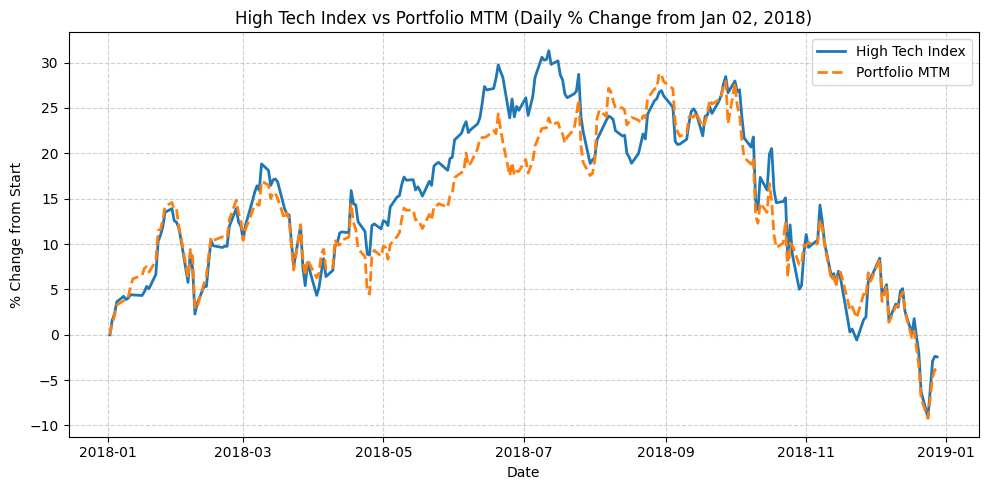

In [17]:
"""======================================================"""
"""
#Version: v1.00
#Authors:  Ann-Marie Walker, Vivek Gupta, and Manuj Arora, NJIT, Sept 2025

This code performs the following tasks:
1. Create an index called "High Tech Index" which calculate the daily average of 10 stocks "Close" price. To accomplish it, we use the "close" dataframe
   created in Quesdtion 2 which captures the close price of all 10 stocks.
2. In the next step, we converted the dataframes to daily percentage change with regards to Jan 02 2018. To accomplish this, we used the 
   "MTM Series High"(mtm_series_high) created in Question 6 response which is used for comparison with "High Tech Index"
3. We created 2 functions called high_tech_index_normalized, and mtm_series_normalized for percentage conversion.
4. In the last step, we plotted the time-series line chart comparing the performance of two datasets - High Tech Index and Portfolio MTM. Here the x-axis
   represents the Date and y-axis representing change from Start i.e, the cumulative percentage change in value since Jan 2 2018.
5. We are printing the following as output:
    1. high_tech_index dataframe
    2. mtm_series_high dataframe
    3. o/p of high_tech_index_normalized to show the percentage values with regards to baseline date
    4. o/p of mtm_series_high_normalized to show the percentage values with regards to baseline date
    5. Time Series chart comparing 2 normalized outputs.

    "#Function_Name: high_tech_index"
    "   #Args:  close.mean(axis=1) - pandas series containing the row-wise means of the close dataframe"
                columns=["HighTechIndex"] - specifies the column name for the new dataframe
    "#Output: Dataframe with name high_tech_index which has mean of all 10 stocks daily.

    "# Mathematical Expression - high_tech_index_normalized and mtm_series_high_normalized
    "#Output: creates normalized series showing percentage change from the first date (baseline = 0%)."
================================================================

============================================================"""


import matplotlib.pyplot as plt

high_tech_index = pd.DataFrame(close.mean(axis=1), columns=["HighTechIndex"])
print(high_tech_index)
print(mtm_series_high)

# Convert the dataframes to daily percentage change with regards to Jan 02 2018
high_tech_index_normalized = (high_tech_index/high_tech_index.iloc[0] -1) * 100
mtm_series_normalized = (mtm_series_high/mtm_series_high.iloc[0] -1) * 100
print(high_tech_index_normalized)
print(mtm_series_normalized)

# Plotting the time-series graph
plt.figure(figsize=(10,5))
plt.plot(high_tech_index_normalized.index, high_tech_index_normalized["HighTechIndex"],
         label="High Tech Index", linewidth=2)
plt.plot(mtm_series_normalized.index, mtm_series_normalized,
         label="Portfolio MTM", linewidth=2, linestyle="--")

plt.title("High Tech Index vs Portfolio MTM (Daily % Change from Jan 02, 2018)")
plt.xlabel("Date")
plt.ylabel("% Change from Start")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




8. Download the USD/JPY 2018 historical data then use the "Close" column as the rate to convert your MTM series from USD to JPY. Plot the two MTM curves. You will need to convert to daily percentage change too.

Date
2018-01-02    0.000000
2018-01-03    1.224752
2018-01-04    2.076778
2018-01-05    3.283753
2018-01-08    3.744034
                ...   
2018-12-21   -0.000267
2018-12-24   -3.686927
2018-12-26    4.672649
2018-12-27    3.995861
2018-12-28    5.181652
Length: 250, dtype: float64
Date
2018-01-02    0.000000
2018-01-03    0.752603
2018-01-04    1.929234
2018-01-05    3.295659
2018-01-08    4.097300
                ...   
2018-12-21   -1.418194
2018-12-24   -5.152505
2018-12-26    2.474681
2018-12-27    2.553549
2018-12-28    3.395513
Length: 250, dtype: float64


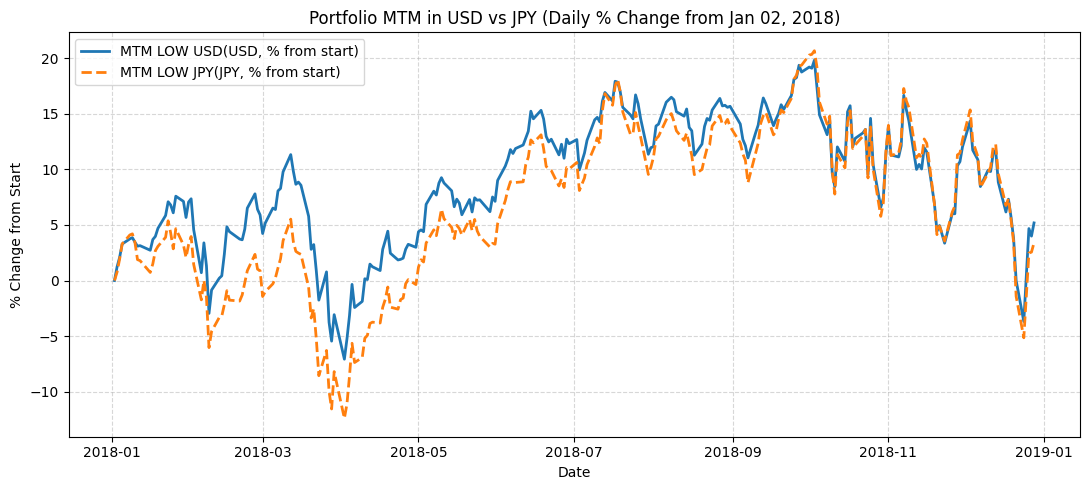

In [18]:
"""======================================================"""
"""
#Version: v1.00
#Authors:  Ann-Marie Walker, Vivek Gupta, and Manuj Arora, NJIT, Sept 2025

This code performs the following tasks:
1. Reads the usdjpy.csv and then create a dataframe called df_usdjpy. We also clean and organize the date index.
2. We then extract the "Close" column from the dataframe and create an independent copy named usd_jpy. We normalize this dataframe to remove time components
   from datetime index.
3. Same ways, we normalize mtm_series_low dataframe(created in Question 2). For this question, we are leveraging the mtm_series_low dataframe. 
   Using the intersection function, we align the dataframes to have matching dates. This is because the usdjpy.csv has 261 dates (it includes date for US holidays) and the other 
   dataframes have 250 dates (not inclusive of US holidays). 
4. We then multiply the 2 dataframes to get the MTM amount in JPY.
5. Just like Question 7, we convert the MTM amount to daily percentage change with regard to Jan 02 2018 (first trading day of the year)
6. We plot the time series graph, comparing the MTM in USD with MTM in JPY for the entire year.
5. We are printing the following as output:
    1. o/p of mtm_low_usd_normalized to show the percentage values with regards to baseline date
    2. o/p of mtm_low_jpy_normalized to show the percentage values with regards to baseline date
    5. Time Series chart comparing 2 normalized outputs.
================================================================

============================================================"""

# Read the csv file and create a dataframe

df_usdjpy = pd.read_csv("/Users/aromanuj/Documents/DS637-MidtermP/usdjpy.csv", encoding='latin-1', index_col="Date")

df_usdjpy.index = pd.to_datetime(df_usdjpy.index.astype(str).str.strip(), format="%d-%b-%y", errors="coerce")
df_usdjpy = df_usdjpy.sort_index()

mtm_series_low.index = pd.to_datetime(mtm_series_low.index).normalize()
mtm_series_high.index = pd.to_datetime(mtm_series_low.index).normalize()
usd_jpy = df_usdjpy["Close"].copy()
usd_jpy.index = usd_jpy.index.normalize()

# aligning the dates for the two dataframes 
common_low = mtm_series_low.index.intersection(usd_jpy.index)
mtm_low_usd = mtm_series_low.loc[common_low].astype(float)
usd_jpy = usd_jpy.loc[common_low].astype(float)

mtm_low_jpy = (mtm_low_usd * usd_jpy)


# Convert the dataframes to daily percentage change with regards to Jan 02 2018
mtm_low_usd_normalized = (mtm_low_usd/float(mtm_low_usd.iloc[0]) -1) * 100
mtm_low_jpy_normalized = (mtm_low_jpy/float(mtm_low_jpy.iloc[0]) -1) * 100
print(mtm_low_usd_normalized)
print(mtm_low_jpy_normalized)

# Plotting the time-series graph
plt.figure(figsize=(11,5))
plt.plot(mtm_low_usd_normalized.index, mtm_low_usd_normalized.values, label="MTM LOW USD(USD, % from start)", linewidth=2)
plt.plot(mtm_low_jpy_normalized.index, mtm_low_jpy_normalized.values, label="MTM LOW JPY(JPY, % from start)", linewidth=2, linestyle="--")
plt.title("Portfolio MTM in USD vs JPY (Daily % Change from Jan 02, 2018)")
plt.xlabel("Date")
plt.ylabel("% Change from Start")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()





9. The above two strategies both rebalance every 5 days. Try to change the days interval and find the optimal days interval that maximizes the MTM on 12/31/2018. 

In [19]:
"""======================================================"""
"""
#  This Python code solves the optimal rebalancing days interval problem statement.
# The code reads stock data from CSV files, processes the data to extract close and adjusted
# Close prices, and implements a rebalancing strategy every N trading days to find the MTM-maximizing interval.
# The code tracks the mark-to-market (MTM) value of the portfolio over time and
# provides a summary of the best interval of rebalancing in the decreasing order by MTM.

    "#Version: v1.00"
    "#Author: Vivek Gupta, Manuj Arora, Ann-Marie C. Walker NJIT, Sept 2025"
================================================================
   Key logics used- 
    1. Have a formula to calculate dates to rebalance, based on the chosen interval.
================================================================

============================================================"""



# Initialize portfolio on START_DATE

START_DATE = "2018-01-02"
INITIAL_STOCKS = ["IBM", "MSFT", "GOOG", "AAPL", "AMZN"]  
TOTAL_INITIAL_CASH = 5_000_000
N_TO_BUY_AT_REBALANCE = 5               # buy the 5 worst decliners stocks, 
END_DATE = "2018-12-31"                 # evaluation date


# Prepare Close / AdjClose frames
# df_close_adjclose must already exist and have columns like 'AAPL_Close','AAPL_AdjClose', etc.
# Close prices (columns named by ticker)
close = df_close_adjclose[[c for c in df_close_adjclose.columns if c.endswith("_Close")]].copy()
close.columns = [c.replace("_Close", "") for c in close.columns]

# Adj Close prices (columns named by ticker)
adj = df_close_adjclose[[c for c in df_close_adjclose.columns if c.endswith("_AdjClose")]].copy()
adj.columns = [c.replace("_AdjClose", "") for c in adj.columns]

# Ensure dates are sorted and consistent
close = close.sort_index()
adj = adj.reindex(close.index).sort_index()

all_tickers = list(close.columns)
dates = close.index
if START_DATE not in dates:
    raise ValueError(f"START_DATE {START_DATE} not in price index (have {dates.min().date()} → {dates.max().date()})")
EVAL_DATE = pd.Timestamp(END_DATE) if END_DATE in dates else dates.max()


"""======================================================"""
"""
# Sell stocks on a given date function
    "#Function_Name: run_strategy_for_interval"
    "#Args: step_days: int"
    "#Output: value - final_mtm, mtm_series_low"
        "#Version: v1.00"
        "#Author: Vivek Gupta, Manuj Arora, Ann-Marie C. Walker NJIT, Sept 2025"
    ================================================================
    Key Logic used - Initialize portfolio on START_DATE with equal buckets of INITIAL_STOCKS.
                    Loop through rebalance dates every 'step_days' trading days.
                    On each rebalance date:
                    1) Compute AdjClose % change from previous rebalance date to current date.  
                    2) SELL ALL at current Close.
                    3) BUY equal buckets of the worst decliners at current Close.
                    Track MTM daily and return final MTM on EVAL_DATE.
                    Order the results by final MTM to find the best interval.
================================================================

============================================================"""
#Function Begins Here

# Wrapper to run your exact strategy for a given interval
def run_strategy_for_interval(step_days: int):
    # Initialize portfolio on START_DATE
    start_idx = dates.get_loc(START_DATE)

    initial_bucket = TOTAL_INITIAL_CASH / len(INITIAL_STOCKS)
    shares = {t: 0 for t in all_tickers}
    cash = 0.0

    for t in INITIAL_STOCKS:
        px = float(close.at[pd.Timestamp(START_DATE), t])
        n = int(np.floor(initial_bucket / px))
        cost = n * px
        shares[t] += n
        cash += (initial_bucket - cost)

    # Track MTM daily
    mtm_series_low = pd.Series(index=dates, dtype=float)

    # Fill MTM from start date until first rebalance day
    for i in range(start_idx, len(dates)):
        d = dates[i]
        mtm_series_low.loc[d] = mtm_on_date(d, shares, cash, close)

    # Rebalance loop (every 'step_days' trading days)
    prev_reb_idx = start_idx

    # Build rebalance indices: start+step, start+2*step, ...
    rebalance_indices = list(range(start_idx + step_days, len(dates), step_days))

    # Loop through rebalance dates
    for r_idx in rebalance_indices:
        d_prev = dates[prev_reb_idx]
        d_cur = dates[r_idx]

        # 1) Compute AdjClose % change from previous rebalance date to current date
        adj_prev = adj.loc[d_prev, all_tickers]
        adj_cur = adj.loc[d_cur, all_tickers]
        pct_change = (adj_cur / adj_prev - 1.0).dropna().sort_values()  # ascending → worst first

        worst_decliners = list(pct_change.index[:N_TO_BUY_AT_REBALANCE])

        # 2) SELL ALL at current Close
        proceeds = sell_all_at_close(d_cur, shares, close)
        cash += proceeds
        shares = {t: 0 for t in all_tickers}

        # 3) BUY equal buckets of the worst decliners at current Close
        new_shares, leftover = buy_equal_buckets_at_close(d_cur, worst_decliners, cash, close)
        cash = leftover
        for t, n in new_shares.items():
            shares[t] += n

        # Update MTM from this day onward
        for i in range(r_idx, len(dates)):
            d = dates[i]
            mtm_series_low.loc[d] = mtm_on_date(d, shares, cash, close)

        prev_reb_idx = r_idx

    # Return MTM at evaluation date + full series (optional)
    final_mtm = float(mtm_series_low.loc[EVAL_DATE])
    return final_mtm, mtm_series_low
#Function Ends Here


# Search for best interval within range of 1 day to 21 days considering 20 trading days in a month
# Same function run_strategy_for_interval(step_days) is invoked in loop
# This function can be modified to go beyond 20 days as well if needed.
intervals_to_try = range(1, 21)  # try 1..20 trading-day intervals
results = {}
series_by_step = {}  # optional: keep the MTM series if you want to inspect/plot the best

for step in intervals_to_try:
    final_mtm, mtm_series_low = run_strategy_for_interval(step)
    results[step] = final_mtm
    series_by_step[step] = mtm_series_low

# Find the best interval
best_step = max(results, key=results.get)
best_mtm = results[best_step]

print(f"Best rebalance interval: every {best_step} trading day(s)")
print(f"Final MTM on {EVAL_DATE.date()}: ${best_mtm:,.2f}")

# This shows top 5 intervals
sorted_res = sorted(results.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 intervals by final MTM:")
for s, v in sorted_res:
    print(f"  {s} days → ${v:,.2f}")

## Program ENDS HERE ##

Best rebalance interval: every 8 trading day(s)
Final MTM on 2018-12-28: $5,775,678.21

Top 5 intervals by final MTM:
  8 days → $5,775,678.21
  4 days → $5,643,413.45
  15 days → $5,495,604.15
  16 days → $5,377,814.23
  10 days → $5,323,873.15
